In [3]:
import numpy as np
import cv2
import math
from PIL import Image, ImageOps
from matplotlib import pyplot as plt



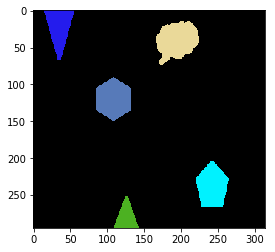

In [4]:
'''
Load and Show for overview reasons only
'''
im = cv2.imread('test_color.png')
plt.imshow(im)

In [5]:
'''
Returns the coords of contours within an image
'''
def get_contours(im):

    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, _ = cv2.findContours(thresh,cv2.CHAIN_APPROX_SIMPLE,cv2.RETR_LIST)

    return contours

In [6]:
'''
Makes rectangles out of points of interest found by get_contours()
'''
def get_boxes(contours):
    my_boxes = []


    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)

        coords = [x,y,w,h]

        my_boxes.append(coords)
    
    return my_boxes

In [7]:
'''
Makes found boxes by get_boxes() square
'''
def make_square(boxes):
    
    squares = []
    
     
    
    for box in boxes:
        x,y,w,h = box
        if h > w:
            diff = h-w
            x = math.floor(x - (diff/2))
            w = math.ceil(w + diff)
    
        if w > h:
            y = math.floor(y - (diff/2))
            h = math.ceil(h + diff)
            
        squares.append([x,y,w,h])
    return squares

In [8]:
'''
!!! Test only function !!!
Shows the found squares by drawing them on the image
'''

def draw_squares(im,squares):
    for square in squares:
        x,y,w,h = square
        im2 = cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
        plt.imshow(im2)
    plt.show()

In [9]:
'''
Combines functions above:
Input is an Image, returns squares around blobs
'''
def get_bounding_boxes(im):
    contours = get_contours(im)
    boxes = get_boxes(contours)
    squares = make_square(boxes)
    
    return squares

In [10]:
'''
Turns Squares around blobs into actual images
'''
def get_found_imgs(im,squares):
    found_imgs = []
    for square in squares:
        new_im = im[square[1]:square[1]+square[3], square[0]:square[0]+square[2]]
        img = Image.fromarray(new_im, 'RGB')
        found_imgs.append(img)
    return found_imgs

In [11]:
'''
Scales all found images to one size
''' 
def scale_imgs(imgs,size):
    scaled_imgs = []
    for im in imgs:
        print("img",im)
        exit()
        new_im = ImageOps.fit(im, size, Image.ANTIALIAS)
        scaled_imgs.append(new_im)
    return scaled_imgs

In [12]:
'''
MAIN FUNCTION!!!

Combines everything above. Takes binary image, original image and set size
Returns list of images found within original image.
'''

def get_roi_imgs(im_bin,im_ori,size):
    squares = get_bounding_boxes(im_bin)
    imgs_unscaled = get_found_imgs(im_ori,squares)
    imgs = scale_imgs(imgs_unscaled,size)
    
    return imgs

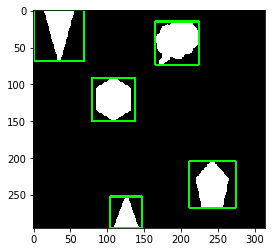

In [13]:
'''
Test Cell! 
Tests bounding boxes
'''

im = cv2.imread('test_black_white.png')
im_original = cv2.imread('test_color.png')
squares = get_bounding_boxes(im)

draw_squares(im,squares)

In [14]:
'''
Execution Cell!

Load Black and White image to work with
Load original image for actual image retrieval
Set size for universal scaling.

'''
im = cv2.imread('test_black_white.png')
im_original = cv2.imread('test_color.png')


size = (60,60)
imgs = get_roi_imgs(im,im_original,size)


img <PIL.Image.Image image mode=RGB size=43x43 at 0x7F5F1310CC18>
img <PIL.Image.Image image mode=RGB size=63x63 at 0x7F5F1310CBA8>
img <PIL.Image.Image image mode=RGB size=59x59 at 0x7F5F1310CE48>
img <PIL.Image.Image image mode=RGB size=59x59 at 0x7F5F1310C710>
img <PIL.Image.Image image mode=RGB size=68x68 at 0x7F5F1310CAC8>


In [1]:
'''
Saves found images to files in current directory.
'''
def imgs_to_files(imgs):
    count = 0
    for im in imgs:
        name = "canditate_"+ str(count) + ".png"
        im.save(name)   
        count += 1
    return

In [ ]:
imgs_to_files(imgs)